# Lead Scoring Case Study

#### `With 37 predictor variables, we need to predict the leads that are most likely to convert into paying customers.`

### Importing and Understanding Data

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.options.mode.chained_assignment = None
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [3]:
# Identifying the encoding of the csv files to be used for Group Case Study 1

with open(r'C:\upGrad\Course 2\Group Case Study 1 - Lead Scoring Case Study\Leads.csv') as f:
    print(f)

<_io.TextIOWrapper name='C:\\upGrad\\Course 2\\Group Case Study 1 - Lead Scoring Case Study\\Leads.csv' mode='r' encoding='cp1252'>


In [4]:
# Reading data for the Leads file

path = r'C:\upGrad\Course 2\Group Case Study 1 - Lead Scoring Case Study'
leads = pd.read_csv(path+'\\Leads.csv')

In [5]:
# Inspecting the leads dataframe

leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

#### Checking for Duplicate IDs

In [6]:
# Making sure that number of duplicate rows are zero

sum(leads.duplicated(subset = "Prospect ID")) == 0

True

In [7]:
sum(leads.duplicated(subset = "Lead Number")) == 0

True

#### Primary Checks

In [8]:
# Determining the number of rows and columns in the dataframe

leads.shape

(9240, 37)

In [9]:
# Checking the information of the entire dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [10]:
# Describing the statistical parameters of the dataframe

leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [11]:
# Viewing the columns in the dataframe

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
# Checking for null values (column-wise) in the dataframe

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# Checking for percentage of null values (column-wise) in the dataframe

leads.isnull().sum() * 100 / len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

<font color = purple> *As we can see, there are several variables with missing values in our data. We'll remove the rows for variables with a small percentage of missing values while dropping columns for those with over `40%` of their values missing.* </font>

In [14]:
# Removing 'Lead Source' rows with null values

leads = leads[~pd.isnull(leads['Lead Source'])]

In [15]:
# Removing 'TotalVisits' rows with null values

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [16]:
# Removing 'Page Views Per Visit' rows with null values

leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

In [17]:
# Removing 'Last Activity' rows with null values

leads = leads[~pd.isnull(leads['Last Activity'])]

In [18]:
# Dropping the columns 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
# 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' since each have between 45% and 52% of their values 
# missing

leads.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
            'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          

In [19]:
# Checking percentage of missing values after removing the appropriate rows and columns above

round(leads.isnull().sum() * 100 / len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.30
Specialization                                   15.77
How did you hear about X Education               24.25
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Visualizing Numeric Variables

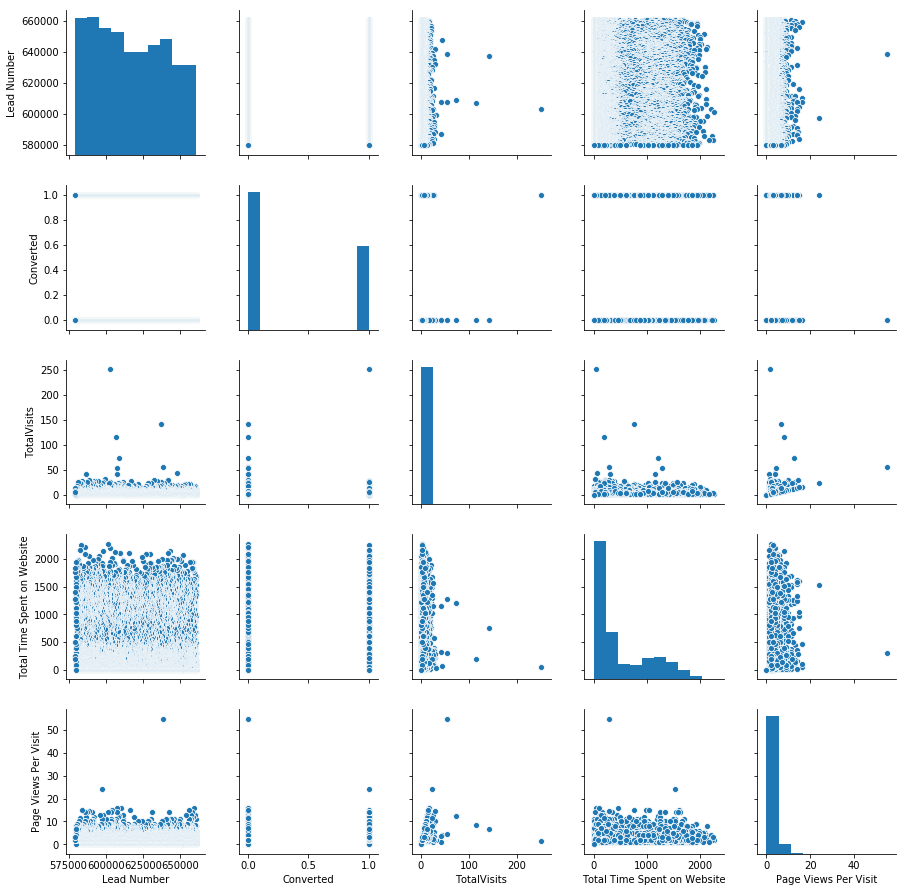

In [20]:
# Making a pairplot for the numeric variables

sns.pairplot(leads)
plt.show()

In [21]:
# Checking correlation for the numeric variables

leads.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

### Visualising Categorical Variables

In [22]:
# Creating a list of categorical variables from the leads dataframe excluding 'Prospect ID'

cat_vars = leads.drop('Prospect ID', axis=1).select_dtypes(include=['object']).columns
cat_vars

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [23]:
# Retrieving frequency distribution for the categorical variables' unique values

for i in cat_vars:
    print(leads[i].value_counts().to_frame(), end='\n\n')

                         Lead Origin
Landing Page Submission         4885
API                             3578
Lead Add Form                    581
Lead Import                       30

                   Lead Source
Google                    2868
Direct Traffic            2543
Olark Chat                1753
Organic Search            1154
Reference                  443
Welingak Website           129
Referral Sites             125
Facebook                    31
bing                         6
google                       5
Click2call                   4
Live Chat                    2
Press_Release                2
Social Media                 2
blog                         1
welearnblog_Home             1
WeLearn                      1
NC_EDM                       1
youtubechannel               1
testone                      1
Pay per Click Ads            1

     Do Not Email
No           8358
Yes           716

     Do Not Call
No          9072
Yes            2

                        

In [24]:
# Handling duplicate value for 'Lead Source' variable as observed above

leads['Lead Source'].replace({'google' : 'Google'}, inplace=True)

In [25]:
# Checking 'Lead Source' to confirm correction made

leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
blog                    1
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

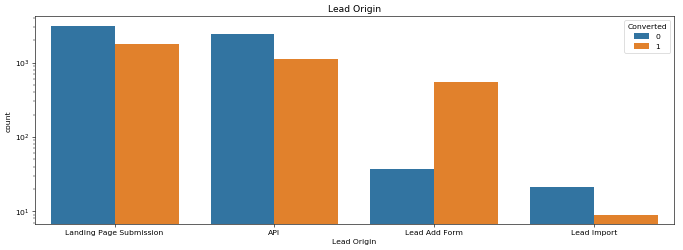

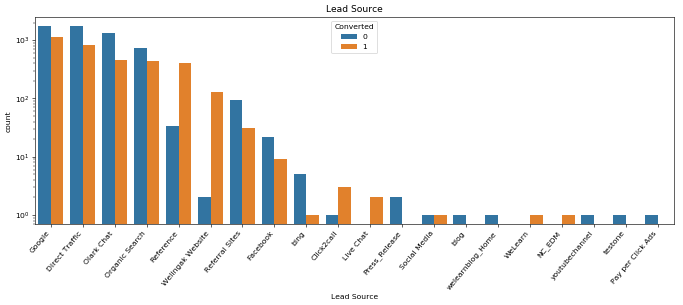

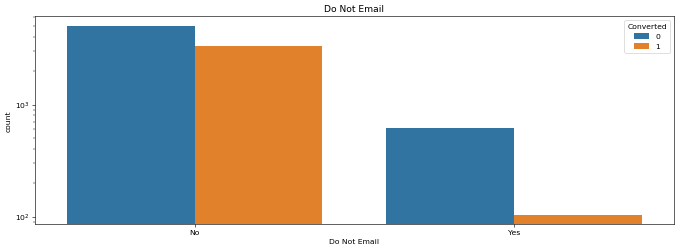

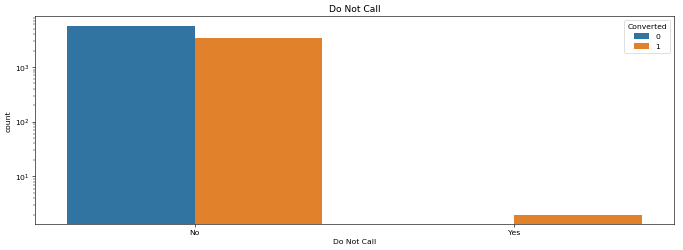

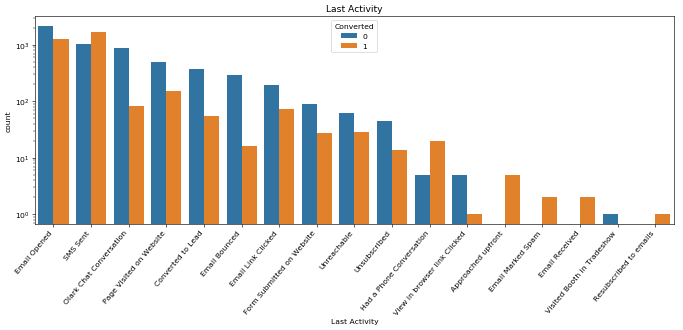

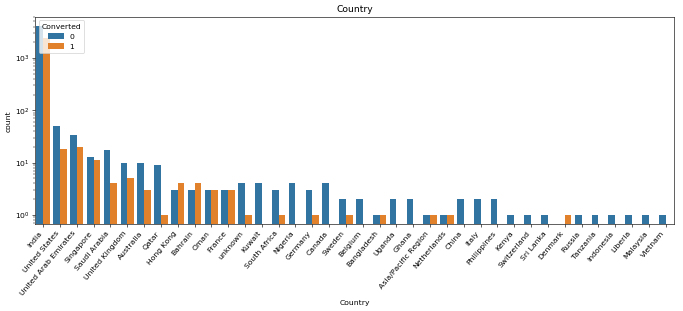

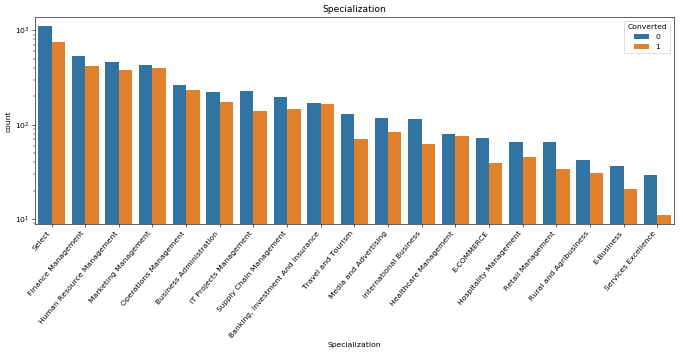

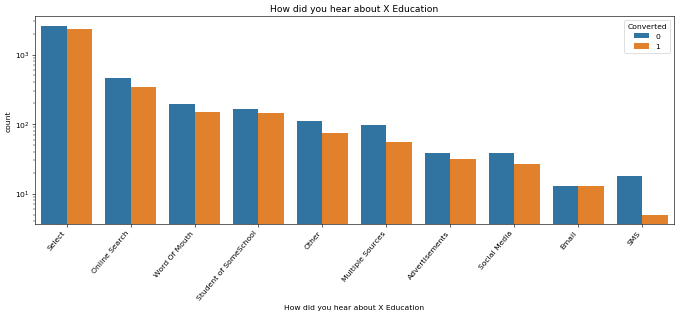

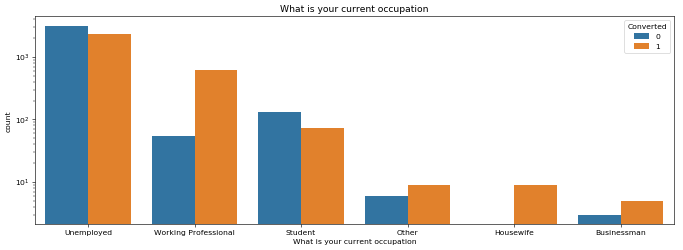

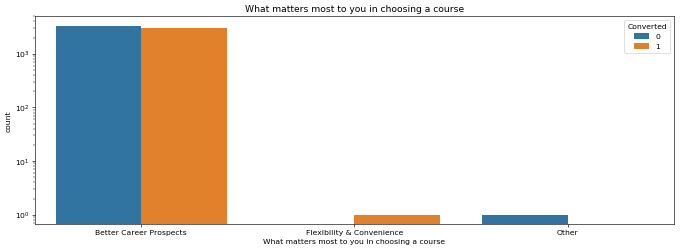

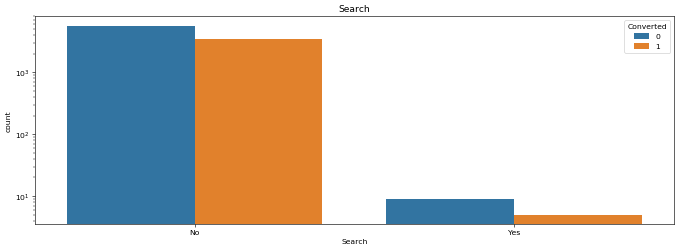

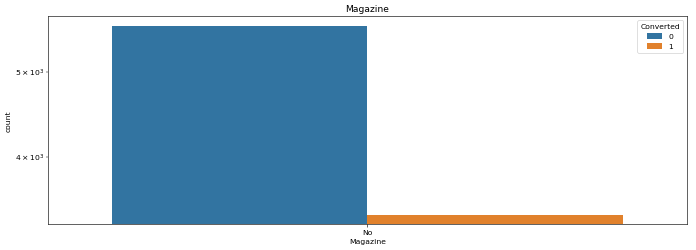

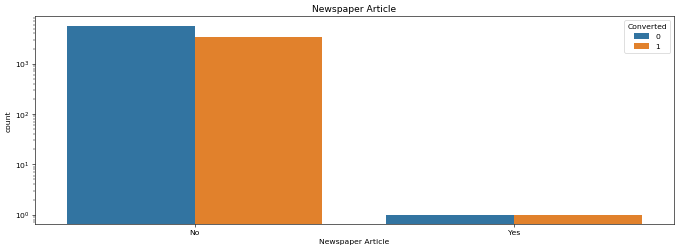

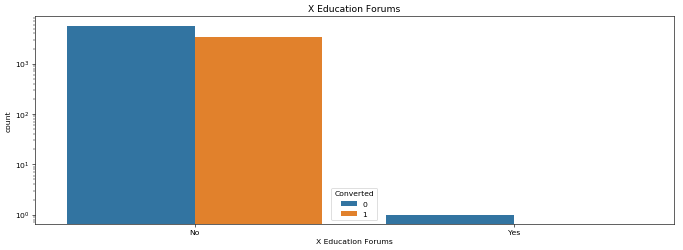

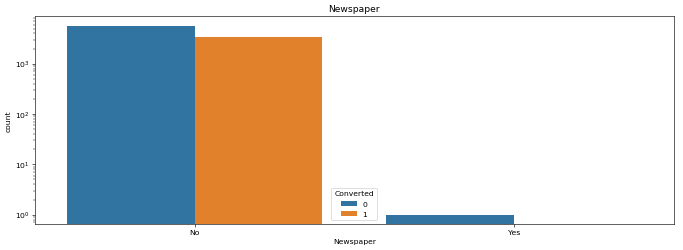

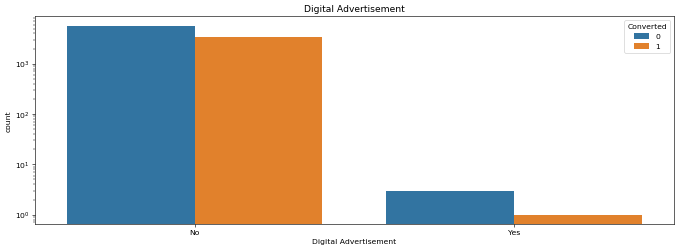

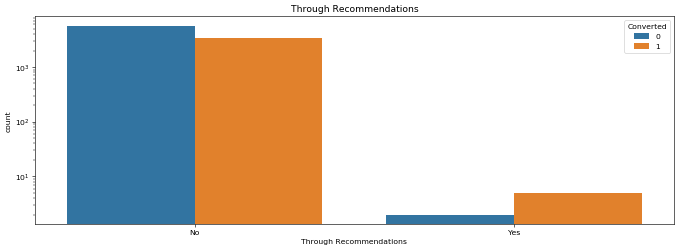

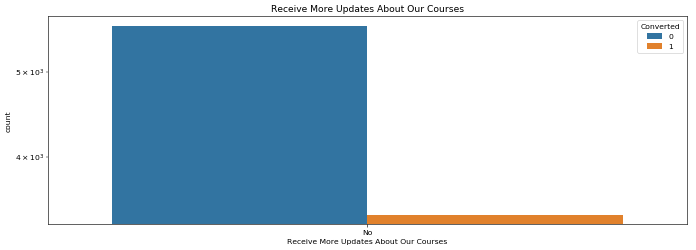

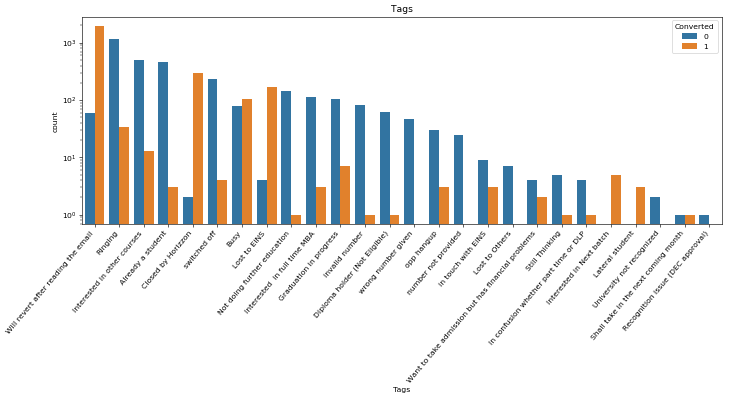

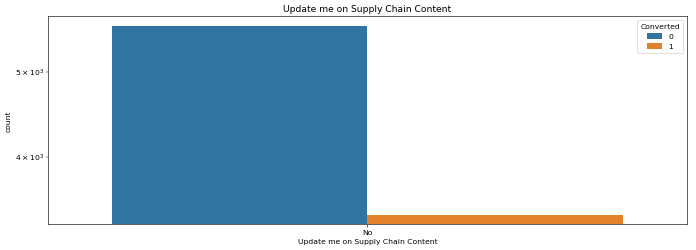

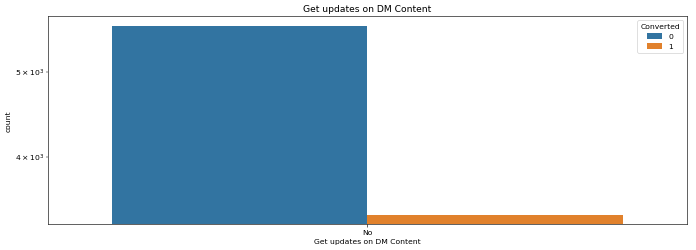

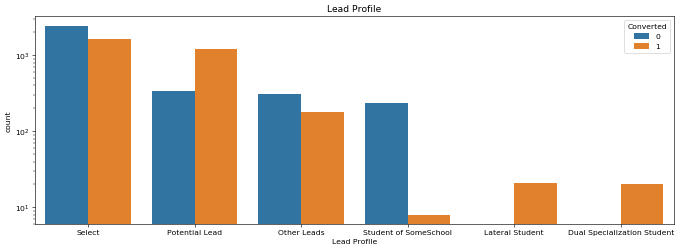

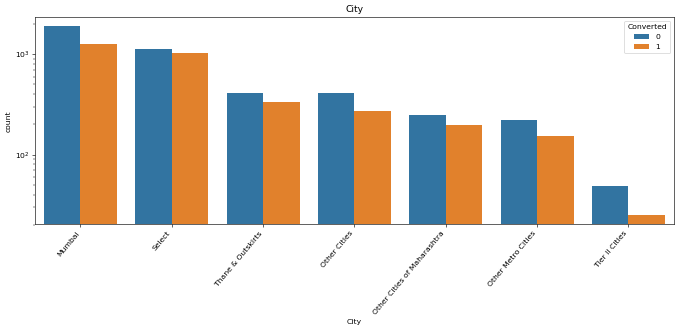

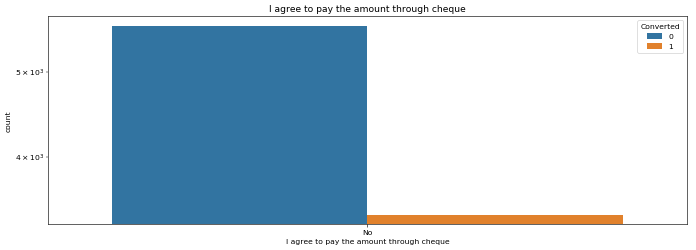

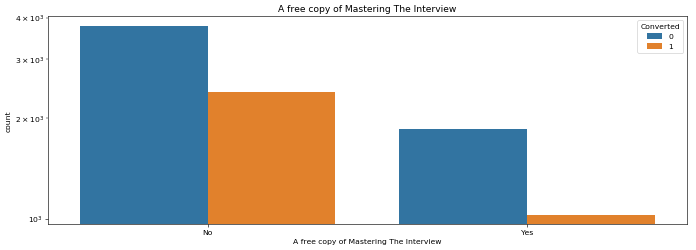

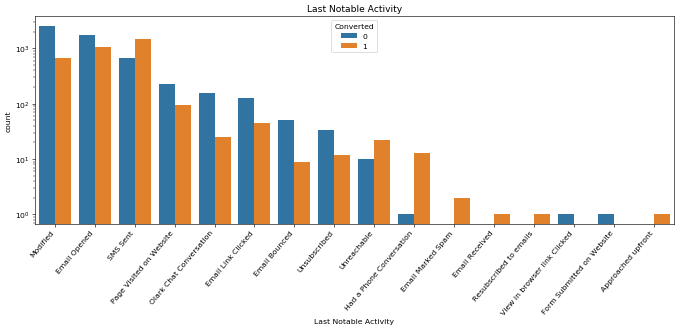

In [26]:
# Segmented univariate analysis of categorical variables w.r.t 'Converted' variable

for i in cat_vars:
    
    # set figure size for larger figure
    plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

    # count plot
    ax = sns.countplot(x=leads[i], hue='Converted', data=leads, order=leads[i].value_counts().index)

    if len(leads[i].unique()) > 7:
        
        # rotate and align the tick labels to look better
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

    # changing to a logarithmic scale so that the range can fit into the size of the plot.
    plt.yscale('log')

    # set title
    ax.set_title(i)
    
    # show plot
    plt.show()

### Data Preparation
- #### Categorical Variables

In [27]:
# Removing categorical (binary) variables where most records have 'No' as the response.
# Also removing 'Prospect ID', Country' and 'City'.
# We don't think these features will be of any value as predictor variables. 

leads.drop(['Prospect ID', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 
            'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Magazine', 'Do Not Call', 
            'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
            'Search', 'Country', 'City'], axis=1, inplace=True)
leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    Lead Profile  \
0          Interested in other courses          Select   
1                              Ringing          Select   
2  Will revert after reading the email  Potential Lead   
3                              Ringing          Select   
4  Will revert after reading the email          Select   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [28]:
# Converting binary variables: Yes to 1 and No to 0

leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, 'No': 0}).astype('float64')
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0}).astype('float64')

In [29]:
# Updating the list of categorical variables from the leads dataframe

cat_vars = leads.select_dtypes(include=['object']).columns
cat_vars

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'Last Notable Activity'],
      dtype='object')

In [30]:
# Handling categorical variables with 'Select' value; to be treated as null value.

for col in cat_vars:
    for val in leads[col].value_counts().index:
        if val=='Select':
            leads[col].replace({val: None}, inplace=True)

In [31]:
# Reviewing first few records of leads dataframe

leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat           0.0   
1       660728                      API  Organic Search           0.0   
2       660727  Landing Page Submission  Direct Traffic           0.0   
3       660719  Landing Page Submission  Direct Traffic           0.0   
4       660681  Landing Page Submission          Google           0.0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                     None   
1             Email Opened                     None   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                     None   

  How did you hear about X Education What is your current occupation  \
0                               None                      Unemployed   
1                               None                      Unemployed   
2                               None                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    Lead Profile  \
0          Interested in other courses            None   
1                              Ringing            None   
2  Will revert after reading the email  Potential Lead   
3                              Ringing            None   
4  Will revert after reading the email            None   

   A free copy of Mastering The Interview Last Notable Activity  
0                                     0.0              Modified  
1                                     0.0          Email Opened  
2                                     1.0          Email Opened  
3                                     0.0              Modified  
4                                     0.0              Modified

#### Dummy Variables

In [32]:
# Creating dummy variables for the categorical variables

dummy_vars = cat_vars.copy()

dummy = pd.concat([pd.get_dummies(leads[col], prefix=col, dummy_na=True, drop_first=True, dtype=float) 
                   for col in dummy_vars], axis=1)

dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  1.0                        0.0   
3                                  1.0                        0.0   
4                                  1.0                        0.0   

   Lead Origin_Lead Import  Lead Origin_nan  Lead Source_Direct Traffic  \
0                      0.0              0.0                         0.0   
1                      0.0              0.0                         0.0   
2                      0.0              0.0                         1.0   
3                      0.0              0.0                         1.0   
4                      0.0              0.0                         0.0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0                   0.0                 0.0                    0.0   
1                   0.0                 0.0                    0.0   
2                   0.0                 0.0                    0.0   
3                   0.0                 0.0                    0.0   
4                   0.0                 1.0                    0.0   

   Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                 0.0                     1.0                         0.0   
1                 0.0                     0.0                         1.0   
2                 0.0                     0.0                         0.0   
3                 0.0                     0.0                         0.0   
4                 0.0                     0.0                         0.0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                       0.0                  0.0   
1                       0.0                  0.0   
2                       0.0                  0.0   
3                       0.0                  0.0   
4                       0.0                  0.0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                           0.0               0.0               0.0   
1                           0.0               0.0               0.0   
2                           0.0               0.0               0.0   
3                           0.0               0.0               0.0   
4                           0.0               0.0               0.0   

   Lead Source_testone  Lead Source_welearnblog_Home  \
0                  0.0                           0.0   
1                  0.0                           0.0   
2                  0.0                           0.0   
3                  0.0                           0.0   
4                  0.0                           0.0   

   Lead Source_youtubechannel  Lead Source_nan  \
0                         0.0              0.0   
1                         0.0              0.0   
2                         0.0              0.0   
3                         0.0              0.0   
4                         0.0              0.0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                              0.0                          0.0   
1                        

In [33]:
# Adding the results back to the original (leads) dataframe

leads = pd.concat([leads, dummy], axis = 1)

In [34]:
# Checking leads to confirm changes made

leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat           0.0   
1       660728                      API  Organic Search           0.0   
2       660727  Landing Page Submission  Direct Traffic           0.0   
3       660719  Landing Page Submission  Direct Traffic           0.0   
4       660681  Landing Page Submission          Google           0.0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                     None   
1             Email Opened                     None   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                     None   

  How did you hear about X Education What is your current occupation  \
0                               None                      Unemployed   
1                               None                      Unemployed   
2                               None                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    Lead Profile  \
0          Interested in other courses            None   
1                              Ringing            None   
2  Will revert after reading the email  Potential Lead   
3                              Ringing            None   
4  Will revert after reading the email            None   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                     0.0              Modified   
1                                     0.0          Email Opened   
2                                     1.0          Email Opened   
3                                     0.0              Modified   
4                                     0.0              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  1.0                        0.0   
3                                  1.0                        0.0   
4                                  1.0                        0.0   

   Lead Origin_Lead Import  Lead Origin_nan  Lead Source_Direct Traffic  \
0                      0.0              0.0                         0.0   
1                      0.0              0.0                         0.0   
2                      0.0              0.0                         1.0   
3                      0.0              0.0                         1.0   
4                      0.0              0.0                         0.0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0                   0.0                 0.0                    0.0   
1                   0.0                 0.0                    0.0   
2                   0.0                 0.0                    0.0   
3                   0.0                 0.0                    0.0   
4                   0.0                 1.0 

In [35]:
# Dropping variables for which we have created dummy variables

leads.drop(dummy_vars, axis=1, inplace=True)

In [36]:
leads.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737           0.0          0          0.0   
1       660728           0.0          0          5.0   
2       660727           0.0          1          2.0   
3       660719           0.0          0          1.0   
4       660681           0.0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                     0.0   
1                                     0.0   
2                                     1.0   
3                                     0.0   
4                                     0.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  1.0                        0.0   
3                                  1.0                        0.0   
4                                  1.0                        0.0   

   Lead Origin_Lead Import  Lead Origin_nan  Lead Source_Direct Traffic  \
0                      0.0              0.0                         0.0   
1                      0.0              0.0                         0.0   
2                      0.0              0.0                         1.0   
3                      0.0              0.0                         1.0   
4                      0.0              0.0                         0.0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0                   0.0                 0.0                    0.0   
1                   0.0                 0.0                    0.0   
2                   0.0                 0.0                    0.0   
3                   0.0                 0.0                    0.0   
4                   0.0                 1.0                    0.0   

   Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                 0.0                     1.0                         0.0   
1                 0.0                     0.0                         1.0   
2                 0.0                     0.0                         0.0   
3                 0.0                     0.0                         0.0   
4                 0.0                     0.0                         0.0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                       0.0                  0.0   
1                       0.0                  0.0   
2                       0.0                  0.0   
3                       0.0                  0.0   
4                       0.0                  0.0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                           0.0               0.0               0.0   
1                           0.0               0.0               0.0   
2                           0.0               0.0               0.

### Checking for Outliers

In [37]:
# Checking for outliers in the continuous variables

num_leads = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [38]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

num_leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

<font color = purple> *From the distribution shown above, we can see that there are outliers in our data for the features `TotalVisits`, `Total Time Spent on Website` and `Page Views Per Visit`. The numbers are not gradually increasing for these three variables.* </font>

In [39]:
# Checking each of the three aforementioned variables for their respective number of outliers

out_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for i in out_vars:

    Q1 = leads[i].quantile(0.25)        # taking the value of first quantile for each column
    Q3 = leads[i].quantile(0.75)        # taking the value of third quantile for each column

    IQR = Q3 - Q1                          # finding the inter-quartile range

    lower_fence = Q1 - 1.5*IQR             # calculating the lower fence
    upper_fence = Q3 + 1.5*IQR             # calculating the upper fence

    # Capturing all the values lower than the lower fence and higher than the upper fence
    outliers = (leads[i] < lower_fence) | (leads[i] > upper_fence)
    
    # setting the title of the column
    print(i)                    
    
    # printing the outlier value count for the column
    print(outliers.value_counts(), end='\n\n')

TotalVisits
False    8807
True      267
Name: TotalVisits, dtype: int64

Total Time Spent on Website
False    9074
Name: Total Time Spent on Website, dtype: int64

Page Views Per Visit
False    8728
True      346
Name: Page Views Per Visit, dtype: int64



<font color = purple> *From the distribution shown above, we can see that there are a number of outliers in our data for the features `TotalVisits` and `Page Views Per Visit`. However, we'll leave them as is.* </font>

### Reviewing Missing Values

In [40]:
leads.isnull().sum()

Lead Number                                                                0
Do Not Email                                                               0
Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
A free copy of Mastering The Interview                                     0
Lead Origin_Landing Page Submission                                        0
Lead Origin_Lead Add Form                                                  0
Lead Origin_Lead Import                                                    0
Lead Origin_nan                                                            0
Lead Source_Direct Traffic                                                 0
Lead Source_Facebook                                                       0

In [41]:
# Identifying the dummy variables for null values i.e. those having a suffix of '_nan'

for col in leads.columns:
    if '_nan' in col:
        print(col)

Lead Origin_nan
Lead Source_nan
Last Activity_nan
Specialization_nan
How did you hear about X Education_nan
What is your current occupation_nan
What matters most to you in choosing a course_nan
Tags_nan
Lead Profile_nan
Last Notable Activity_nan


In [42]:
# Checking shape of leads dataframe

leads.shape

(9074, 131)

### Feature Standardization

In [43]:
# Normalizing continuous features

df = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [44]:
normalized_df = (df - df.mean()) / df.std()
leads = leads.drop(df, axis=1)
leads = pd.concat([leads, normalized_df], axis=1)
leads.head()

Lead Number  Do Not Email  Converted  \
0       660737           0.0          0   
1       660728           0.0          0   
2       660727           0.0          1   
3       660719           0.0          0   
4       660681           0.0          1   

   A free copy of Mastering The Interview  \
0                                     0.0   
1                                     0.0   
2                                     1.0   
3                                     0.0   
4                                     0.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  1.0                        0.0   
3                                  1.0                        0.0   
4                                  1.0                        0.0   

   Lead Origin_Lead Import  Lead Origin_nan  Lead Source_Direct Traffic  \
0                      0.0              0.0                         0.0   
1                      0.0              0.0                         0.0   
2                      0.0              0.0                         1.0   
3                      0.0              0.0                         1.0   
4                      0.0              0.0                         0.0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0                   0.0                 0.0                    0.0   
1                   0.0                 0.0                    0.0   
2                   0.0                 0.0                    0.0   
3                   0.0                 0.0                    0.0   
4                   0.0                 1.0                    0.0   

   Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                 0.0                     1.0                         0.0   
1                 0.0                     0.0                         1.0   
2                 0.0                     0.0                         0.0   
3                 0.0                     0.0                         0.0   
4                 0.0                     0.0                         0.0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                       0.0                  0.0   
1                       0.0                  0.0   
2                       0.0                  0.0   
3                       0.0                  0.0   
4                       0.0                  0.0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                           0.0               0.0               0.0   
1                           0.0               0.0               0.0   
2                           0.0               0.0               0.0   
3                           0.0               0.0               0.0   
4                           0.0               0.0               0.0   

   Lead Source_testone  Lead Source_welearnblog_Home  \
0                  0.0                           0.0   
1                  0.0                           0.0   
2                  0.0                           0.0   
3                  0.0                     

### Checking the Conversion Rate

In [45]:
(sum(leads['Converted']) / len(leads['Converted']))*100

37.85541106458012

<font color = purple> *We have almost `38%` conversion rate.* </font>

## Model Building

### Splitting Data into Training and Test Sets

In [46]:
# Putting feature variable to X

X = leads.drop(['Lead Number', 'Converted'], axis=1)

# Putting response variable to y
y = leads['Converted']

In [47]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## PCA
#### Applying principal component analysis on the train dataset

In [48]:
X_train.shape

(6351, 129)

In [49]:
pca = PCA(random_state=42)

In [50]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [51]:
pca.components_

array([[ 2.40956882e-03,  1.26347500e-01,  2.14571665e-01, ...,
         5.39624896e-01,  4.36905578e-01,  5.52713545e-01],
       [ 2.41321816e-02, -2.26714197e-02, -2.59001130e-02, ...,
         5.28842654e-01, -4.69466922e-01,  1.66824531e-01],
       [-5.40241636e-03,  2.78065631e-02, -2.51780693e-02, ...,
         3.09476025e-01, -6.06098629e-01, -4.94360247e-02],
       ...,
       [-0.00000000e+00, -3.14418630e-17, -4.23464626e-17, ...,
         1.21430643e-17,  2.34187669e-17,  3.46944695e-18],
       [-0.00000000e+00,  8.06646416e-17, -1.35089564e-16, ...,
        -7.80625564e-18, -1.43114687e-17,  6.93889390e-18],
       [-0.00000000e+00, -6.71191244e-19,  1.83780757e-19, ...,
         2.78227710e-20,  8.00365383e-20,  1.22731126e-19]])

#### Looking at the explained variance ratio for each component

In [52]:
pca.explained_variance_ratio_

array([2.27185230e-01, 1.11068917e-01, 8.54001302e-02, 6.79335851e-02,
       6.31032771e-02, 5.53528235e-02, 4.33980480e-02, 3.92986332e-02,
       3.50840164e-02, 1.57168679e-02, 1.45272450e-02, 1.42237885e-02,
       1.24348960e-02, 1.20136844e-02, 1.17145028e-02, 1.11982126e-02,
       1.03165395e-02, 1.00246482e-02, 9.26404188e-03, 8.61581331e-03,
       7.79784289e-03, 7.73964215e-03, 6.95984804e-03, 6.61849660e-03,
       6.01069012e-03, 5.93734915e-03, 5.40906330e-03, 5.12730960e-03,
       4.47547428e-03, 4.39254207e-03, 4.28558798e-03, 4.14781951e-03,
       3.94000551e-03, 3.81801232e-03, 3.44717366e-03, 3.32596075e-03,
       2.91440064e-03, 2.75842744e-03, 2.54967159e-03, 2.49189725e-03,
       2.41062305e-03, 2.27232102e-03, 2.23366543e-03, 2.20000888e-03,
       2.10633754e-03, 2.06688360e-03, 2.05167382e-03, 1.97441220e-03,
       1.89361522e-03, 1.68995274e-03, 1.67806586e-03, 1.61716856e-03,
       1.56998617e-03, 1.49407082e-03, 1.43822283e-03, 1.34654365e-03,
      

#### Making a scree plot for the explained variance

In [53]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.22718523, 0.33825415, 0.42365428, 0.49158786, 0.55469114,
       0.61004396, 0.65344201, 0.69274064, 0.72782466, 0.74354153,
       0.75806877, 0.77229256, 0.78472746, 0.79674114, 0.80845564,
       0.81965386, 0.8299704 , 0.83999505, 0.84925909, 0.8578749 ,
       0.86567274, 0.87341239, 0.88037223, 0.88699073, 0.89300142,
       0.89893877, 0.90434783, 0.90947514, 0.91395062, 0.91834316,
       0.92262875, 0.92677657, 0.93071657, 0.93453458, 0.93798176,
       0.94130772, 0.94422212, 0.94698055, 0.94953022, 0.95202212,
       0.95443274, 0.95670506, 0.95893872, 0.96113873, 0.96324507,
       0.96531195, 0.96736363, 0.96933804, 0.97123166, 0.97292161,
       0.97459967, 0.97621684, 0.97778683, 0.9792809 , 0.98071912,
       0.98206567, 0.98339911, 0.98472005, 0.98602243, 0.987093  ,
       0.98811993, 0.98912397, 0.9900852 , 0.99100111, 0.99187052,
       0.99262236, 0.99332393, 0.99391669, 0.99442277, 0.99492105,
       0.99540098, 0.99584698, 0.99626718, 0.99661896, 0.99694

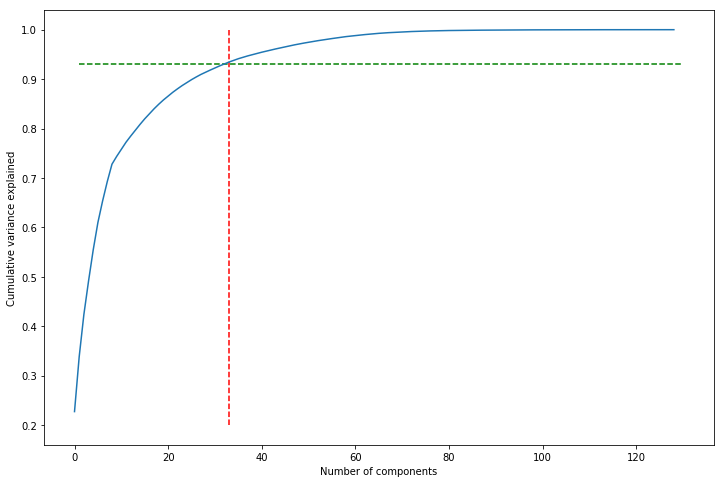

In [54]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=33, ymax=1, ymin=0.2, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=130, xmin=1, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.show()

#### PCA with `33` components

In [55]:
pca_final = IncrementalPCA(n_components=33)

In [56]:
df_train_pca = pca_final.fit_transform(X_train)

In [57]:
df_train_pca.shape

(6351, 33)

#### Creating and plotting a correlation matrix for the principal components

In [58]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [59]:
corrmat.shape

(33, 33)

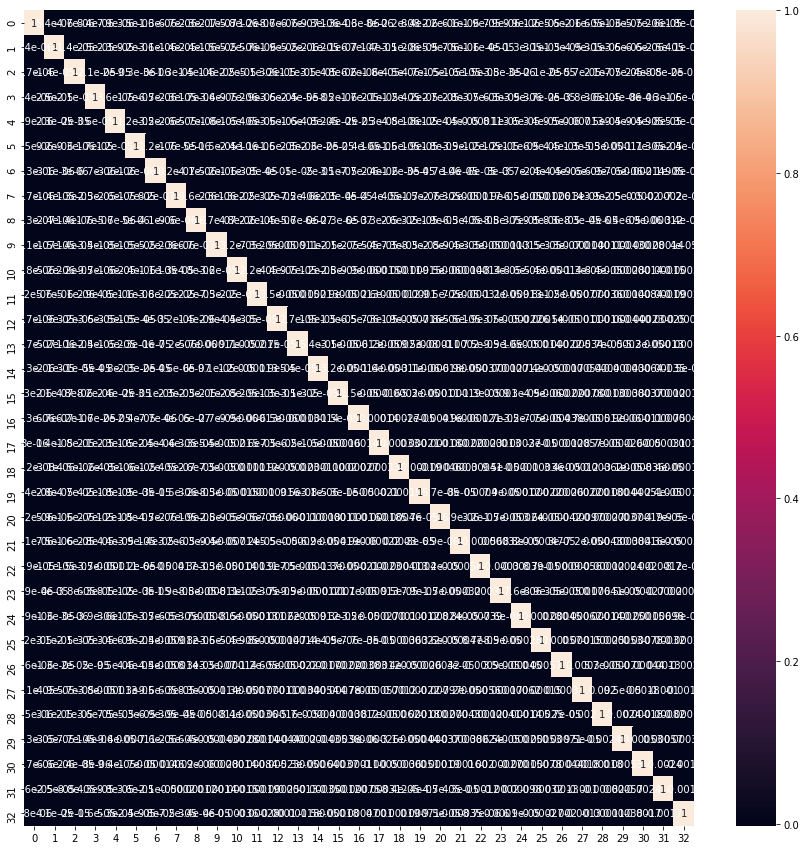

In [60]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

<font color = purple> *It's clear from the correlation matrix above that none of the 33 variables are correlated with each other.* </font>

#### Applying the transformation on the test set

In [61]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2723, 33)

## Logistic Regression
#### Applying logistic regression on our principal components data

In [62]:
learner_pca = LogisticRegression()

In [63]:
model_pca = learner_pca.fit(df_train_pca, y_train)

#### Making predictions on the test set

In [64]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [65]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.95'

#### Making it a little more unsupervised 

In [66]:
pca_again = PCA(0.90)

In [67]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [68]:
df_train_pca2.shape

(6351, 27)

#### Following it up with a logistic regression model

In [69]:
learner_pca2 = LogisticRegression()

In [70]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [71]:
df_test_pca2 = pca_again.transform(X_test)

In [72]:
df_test_pca2.shape

(2723, 27)

In [73]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [74]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.95'

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [75]:
y_train_pred = model_pca2.predict_proba(df_train_pca2)[:,1]

In [76]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  CustID
0          0        0.064876    3009
1          0        0.016051    1012
2          0        0.013777    9226
3          1        0.805352    4750
4          1        0.815451    7987

### Finding the Optimal Cutoff Point

In [77]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Converted  Converted_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0        0.064876    3009    1    0    0    0    0    0    0    0   
1          0        0.016051    1012    1    0    0    0    0    0    0    0   
2          0        0.013777    9226    1    0    0    0    0    0    0    0   
3          1        0.805352    4750    1    1    1    1    1    1    1    1   
4          1        0.815451    7987    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    1    0  
4    1    0

In [78]:
# Calculating the accuracy, sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positives
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.806487  0.968929  0.704738
0.2   0.2  0.879074  0.937040  0.842766
0.3   0.3  0.897024  0.913737  0.886556
0.4   0.4  0.907416  0.885119  0.921383
0.5   0.5  0.909306  0.851186  0.945711
0.6   0.6  0.904425  0.808258  0.964661
0.7   0.7  0.896394  0.773099  0.973624
0.8   0.8  0.886789  0.730989  0.984379
0.9   0.9  0.854039  0.633279  0.992318


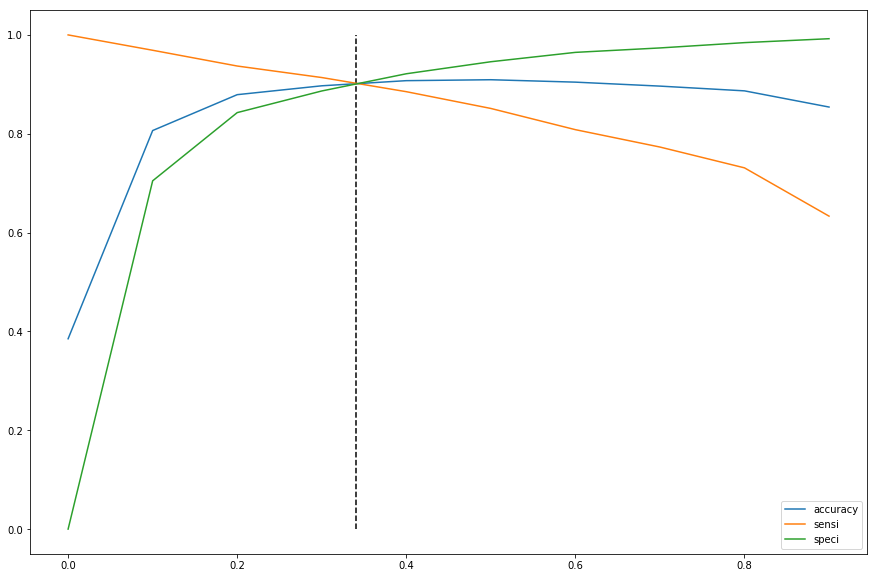

In [79]:
# Plotting the accuracy, sensitivity and specificity for the various probabilities

plt.figure(figsize=[15,10])
plt.vlines(x=0.34, ymax=1.0, ymin=0.0, colors="k", linestyles="--")
plt.plot(cutoff_df['prob'], cutoff_df[['accuracy','sensi','speci']])
plt.legend(cutoff_df[['accuracy','sensi','speci']])
plt.show()

<font color = purple> *From the curve above, `0.34` is the optimum point to take as a cutoff probability.* </font>

In [80]:
y_train_pred_final['Final_Pred_0.34'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0        0.064876    3009    1    0    0    0    0    0    0    0   
1          0        0.016051    1012    1    0    0    0    0    0    0    0   
2          0        0.013777    9226    1    0    0    0    0    0    0    0   
3          1        0.805352    4750    1    1    1    1    1    1    1    1   
4          1        0.815451    7987    1    1    1    1    1    1    1    1   

   0.8  0.9  Final_Pred_0.34  
0    0    0                0  
1    0    0                0  
2    0    0                0  
3    1    0                1  
4    1    0                1

In [81]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Final_Pred_0.34'])

0.9022201228153047

In [82]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['Final_Pred_0.34'])
confusion1

array([[3527,  378],
       [ 243, 2203]], dtype=int64)

In [83]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [84]:
# Checking the Sensitivity (aka Recall) of our logistic regression model

TP / float(TP+FN)

0.9006541291905151

In [85]:
# Checking the Specificity

TN / float(TN+FP)

0.9032010243277849

In [86]:
# Checking the false positive rate i.e. predicting conversion when customer has not converted

FP/ float(TN+FP)

0.09679897567221511

In [87]:
# Checking the positive predictive value (aka Precision)

TP / float(TP+FP)

0.8535451375435877

In [88]:
# Checking the negative predictive value

TN / float(TN+FN)

0.9355437665782493

### Precision and Recall

In [89]:
# Confirming Precision using sklearn

precision_score(y_train_pred_final.Converted, y_train_pred_final['Final_Pred_0.34'])

0.8535451375435877

In [90]:
# Confirming Recall using sklearn

recall_score(y_train_pred_final.Converted, y_train_pred_final['Final_Pred_0.34'])

0.9006541291905151

### Precision and Recall Tradeoff

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

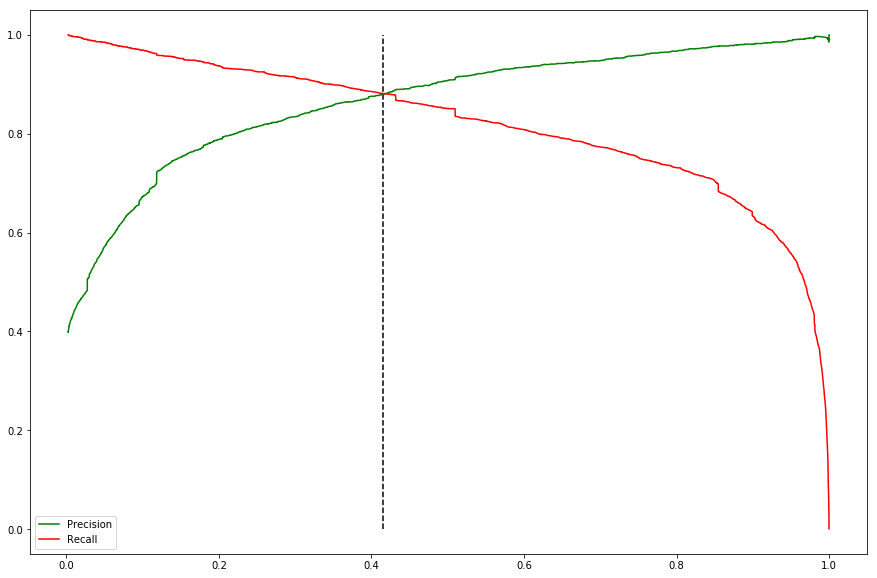

In [92]:
plt.figure(figsize=[15,10])
plt.vlines(x=0.415, ymax=1.0, ymin=0.0, colors="k", linestyles="--")
plt.plot(thresholds, p[:-1], "g-", label='Precision')
plt.plot(thresholds, r[:-1], "r-", label='Recall')
plt.legend()
plt.show()

<font color = purple> *From the curve above, `0.415` is the optimum point to take as a cutoff probability.* </font>

In [93]:
y_train_pred_final['Final_Pred_0.415'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.415 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0        0.064876    3009    1    0    0    0    0    0    0    0   
1          0        0.016051    1012    1    0    0    0    0    0    0    0   
2          0        0.013777    9226    1    0    0    0    0    0    0    0   
3          1        0.805352    4750    1    1    1    1    1    1    1    1   
4          1        0.815451    7987    1    1    1    1    1    1    1    1   

   0.8  0.9  Final_Pred_0.34  Final_Pred_0.415  
0    0    0                0                 0  
1    0    0                0                 0  
2    0    0                0                 0  
3    1    0                1                 1  
4    1    0                1                 1

In [94]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Final_Pred_0.415'])

0.9078885214926783

In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['Final_Pred_0.415'])
confusion2

array([[3610,  295],
       [ 290, 2156]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Checking the Sensitivity (aka Recall) of our logistic regression model

TP / float(TP+FN)

0.8814390842191333

In [98]:
# Checking the Specificity

TN / float(TN+FP)

0.9244558258642765

In [99]:
# Checking the false positive rate i.e. predicting conversion when customer has not converted

FP/ float(TN+FP)

0.07554417413572344

In [100]:
# Checking the positive predictive value (aka Precision)

TP / float(TP+FP)

0.879640962872297

In [101]:
# Checking the negative predictive value

TN / float(TN+FN)

0.9256410256410257

### Precision and Recall

In [102]:
# Confirming Precision using sklearn

precision_score(y_train_pred_final.Converted, y_train_pred_final['Final_Pred_0.415'])

0.879640962872297

In [103]:
# Confirming Recall using sklearn

recall_score(y_train_pred_final.Converted, y_train_pred_final['Final_Pred_0.415'])

0.8814390842191333

### Making Predictions on the Test Set

In [104]:
# Converting pred_probs_test2 - which is an array - to a dataframe

y_pred = pd.DataFrame(pred_probs_test2)

In [105]:
# Reviewing the first few rows of y_pred

y_pred.head()

0
0  0.054134
1  0.997661
2  0.047013
3  0.825967
4  0.031990

In [106]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [107]:
# Assigning index to 'CustID'

y_test_df['CustID'] = y_test_df.index

In [108]:
# Removing index for both dataframes to append them side by side 

y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Combining y_test_df and y_pred

y_test_pred_final = pd.concat([y_test_df, y_pred], axis=1)

In [110]:
y_test_pred_final.head()

Converted  CustID         0
0          0    3271  0.054134
1          1    1490  0.997661
2          0    7936  0.047013
3          1    4216  0.825967
4          0    3830  0.031990

In [111]:
# Renaming the column

y_test_pred_final = y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [112]:
# Rearranging the columns

y_test_pred_final = y_test_pred_final.reindex_axis(['CustID', 'Converted', 'Converted_Prob'], axis=1)

In [113]:
# Reviewing the first few rows of y_pred_final

y_test_pred_final.head()

CustID  Converted  Converted_Prob
0    3271          0        0.054134
1    1490          1        0.997661
2    7936          0        0.047013
3    4216          1        0.825967
4    3830          0        0.031990

#### Model evaluation using `0.34` as the cutoff probability

In [114]:
y_test_pred_final['Final_Pred_0.34'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [115]:
y_test_pred_final.head()

CustID  Converted  Converted_Prob  Final_Pred_0.34
0    3271          0        0.054134                0
1    1490          1        0.997661                1
2    7936          0        0.047013                0
3    4216          1        0.825967                1
4    3830          0        0.031990                0

In [116]:
# Checking the overall accuracy

metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final['Final_Pred_0.34'])

0.8854204921042967

In [117]:
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final['Final_Pred_0.34'])
confusion3

array([[1544,  190],
       [ 122,  867]], dtype=int64)

In [118]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [119]:
# Checking the Sensitivity (aka Recall) of our logistic regression model

TP / float(TP+FN)

0.8766430738119313

In [120]:
# Checking the Specificity

TN / float(TN+FP)

0.8904267589388697

#### `Target Lead Conversion Rate`

In [121]:
# Checking the positive predictive value (aka Precision)

TP / float(TP+FP)

0.8202459791863765

#### Model evaluation using `0.415` as the cutoff probability

In [122]:
y_test_pred_final['Final_Pred_0.415'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.415 else 0)

In [123]:
y_test_pred_final.head()

CustID  Converted  Converted_Prob  Final_Pred_0.34  Final_Pred_0.415
0    3271          0        0.054134                0                 0
1    1490          1        0.997661                1                 1
2    7936          0        0.047013                0                 0
3    4216          1        0.825967                1                 1
4    3830          0        0.031990                0                 0

In [124]:
# Checking the overall accuracy

metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final['Final_Pred_0.415'])

0.8946015424164524

In [125]:
confusion4 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final['Final_Pred_0.415'])
confusion4

array([[1588,  146],
       [ 141,  848]], dtype=int64)

In [126]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [127]:
# Checking the Sensitivity (aka Recall) of our logistic regression model

TP / float(TP+FN)

0.8574317492416582

In [128]:
# Checking the Specificity

TN / float(TN+FP)

0.9158016147635525

#### `Target Lead Conversion Rate`

In [129]:
# Checking the positive predictive value (aka Precision)

TP / float(TP+FP)

0.8531187122736419

<font color = purple> *Our train and test model evaluation metrics are fairly similar so we'll consider this our final model and proceed with the identification of the most promising leads as well as the most important features.* </font>

### Assigning Lead Scores

In [130]:
# Creating a column for capturing lead scores

y_train_pred_final['Lead_Score_Train'] = round(y_train_pred_final['Converted_Prob'] * 100)
y_test_pred_final['Lead_Score_Test'] = round(y_test_pred_final['Converted_Prob'] * 100)

In [131]:
y_train_pred_final.head()

Converted  Converted_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0        0.064876    3009    1    0    0    0    0    0    0    0   
1          0        0.016051    1012    1    0    0    0    0    0    0    0   
2          0        0.013777    9226    1    0    0    0    0    0    0    0   
3          1        0.805352    4750    1    1    1    1    1    1    1    1   
4          1        0.815451    7987    1    1    1    1    1    1    1    1   

   0.8  0.9  Final_Pred_0.34  Final_Pred_0.415  Lead_Score_Train  
0    0    0                0                 0               6.0  
1    0    0                0                 0               2.0  
2    0    0                0                 0               1.0  
3    1    0                1                 1              81.0  
4    1    0                1                 1              82.0

In [132]:
y_test_pred_final.head()

CustID  Converted  Converted_Prob  Final_Pred_0.34  Final_Pred_0.415  \
0    3271          0        0.054134                0                 0   
1    1490          1        0.997661                1                 1   
2    7936          0        0.047013                0                 0   
3    4216          1        0.825967                1                 1   
4    3830          0        0.031990                0                 0   

   Lead_Score_Test  
0              5.0  
1            100.0  
2              5.0  
3             83.0  
4              3.0

In [133]:
# Assigning lead scores derived from train and test data to appropriate leads in their respective dataframes of origin

lead_scores_train = pd.concat([leads['Lead Number'], X_train, y_train_pred_final], join='inner', axis=1)
lead_scores_test = pd.concat([leads['Lead Number'], X_test, y_test_pred_final], join='inner', axis=1)

In [134]:
lead_scores_train.sort_values(by='Lead_Score_Train', ascending=False)

Lead Number  Do Not Email  A free copy of Mastering The Interview  \
2066       639624           0.0                                     0.0   
1327       645887           0.0                                     0.0   
555        654499           0.0                                     0.0   
4752       614226           0.0                                     0.0   
551        654567           0.0                                     1.0   
4760       614202           1.0                                     1.0   
4769       614132           0.0                                     0.0   
5664       606548           0.0                                     1.0   
4773       614100           0.0                                     0.0   
537        654831           0.0                                     0.0   
536        654842           0.0                                     1.0   
4339       618175           0.0                                     0.0   
5658       606574           0.0                                     0.0   
2810       632785           0.0                                     0.0   
4776       614095           0.0                                     0.0   
1330       645843           0.0                                     0.0   
3441       627354           0.0                                     0.0   
527        654947           0.0                                     0.0   
1333       645818           0.0                                     0.0   
3517       626816           1.0                                     0.0   
5650       606650           1.0                                     0.0   
521        655021           0.0                                     0.0   
6069       603274           0.0                                     1.0   
1335       645810           0.0                                     0.0   
1337       645802           0.0                                     0.0   
2772       633046           0.0                                     0.0   
4331       618288           0.0                                     1.0   
2770       633070           0.0                                     0.0   
3534       626664           0.0                                     1.0   
5637       606704           0.0                                     0.0   
1279       646412           0.0                                     0.0   
1276       646432           0.0                                     1.0   
4738       614458           0.0                                     0.0   
2843       632380           0.0                                     0.0   
1204       647132           0.0                                     0.0   
618        654040           0.0                                     0.0   
3447       627305           0.0                                     0.0   
1205       647127           0.0                                     0.0   
2895       631869           0.0                                     1.0   
4710       614625           0.0                                     0.0   
4398       617610           0.0                                     0.0   
2888       631967           0.0                                     0.0   
2883       632028           0.0                                     1.0   
5719       606086           0.0                                     0.0   
2877       632097           0.0                                     1.0   
5714       606149           0.0                                     1.0   
594        654183           0.0                                     0.0   
5707       606186           0.0                                     1.0   
6044       603461           0.0                                     0.0   
5706       606187           0.0                                     1.0   
2871       632169           1.0                                     0.0   
1235       646768           0.0                                     0.0   
1247       646680           0.0

In [135]:
lead_scores_test.sort_values(by='Lead_Score_Test', ascending=False)

Lead Number  Do Not Email  A free copy of Mastering The Interview  \
1047       649028           0.0                                     0.0   
1325       645914           0.0                                     1.0   
2621       634343           0.0                                     0.0   
2625       634306           0.0                                     0.0   
2491       635799           0.0                                     1.0   
215        658231           0.0                                     0.0   
2626       634298           0.0                                     0.0   
1318       646001           0.0                                     1.0   
2481       635864           0.0                                     0.0   
1663       643151           0.0                                     0.0   
2058       639772           0.0                                     0.0   
181        658620           0.0                                     0.0   
2095       639455           0.0                                     0.0   
170        658714           0.0                                     0.0   
467        655371           0.0                                     0.0   
2577       634783           0.0                                     0.0   
474        655338           0.0                                     0.0   
2119       639320           0.0                                     1.0   
867        651284           0.0                                     0.0   
414        656031           0.0                                     0.0   
510        655079           0.0                                     0.0   
1232       646808           0.0                                     0.0   
1937       640921           0.0                                     0.0   
1095       648314           0.0                                     0.0   
1867       641441           0.0                                     0.0   
292        657316           0.0                                     1.0   
1861       641471           0.0                                     0.0   
1950       640751           0.0                                     0.0   
977        649773           0.0                                     1.0   
975        649833           0.0                                     0.0   
1734       642477           0.0                                     1.0   
2053       639858           1.0                                     1.0   
2603       634595           0.0                                     1.0   
1245       646697           0.0                                     0.0   
898        650862           0.0                                     0.0   
1749       642356           0.0                                     0.0   
240        657941           0.0                                     0.0   
411        656072           1.0                                     0.0   
145        659076           0.0                                     0.0   
2644       634094           0.0                                     0.0   
140        659123           0.0                                     0.0   
2249       637909           0.0                                     0.0   
559        654479           0.0                                     0.0   
64         659889           0.0                                     1.0   
1470       644723           0.0                                     0.0   
1374       645512           0.0                                     1.0   
569        654393           0.0                                     0.0   
571        654342           0.0                                     0.0   
2228       638078           0.0                                     1.0   
2310       637387           0.0                                     0.0   
554        654519           0.0                                     1.0   
35         660321           0.0                                     0.0   
30         660402           0.0

## Identifying `Hot Leads`

In [136]:
# Hot Leads - Train

lead_scores_train[lead_scores_train['Lead_Score_Train'] == 100]['Lead Number'].to_frame()

Lead Number
29         660410
44         660194
48         660149
70         659819
71         659820
83         659700
111        659371
132        659170
152        659016
193        658458
249        657823
257        657703
285        657386
314        657092
344        656754
351        656682
365        656560
374        656483
379        656457
381        656413
400        656265
408        656120
439        655661
456        655437
457        655429
461        655405
469        655360
479        655287
486        655240
521        655021
527        654947
536        654842
537        654831
551        654567
555        654499
565        654434
594        654183
618        654040
651        653786
669        653635
673        653593
679        653552
683        653523
698        653292
713        653082
719        653044
739        652787
766        652525
769        652500
772        652463
787        652193
796        652084
799        652060
813        651910
827        651732
861        651363
864        651298
869        651277
872        651251
913        650646
921        650514
936        650338
939        650319
943        650291
946        650265
1002       649426
1005       649409
1007       649404
1021       649293
1054       648987
1063       648765
1069       648641
1077       648540
1111       648136
1154       647903
1166       647709
1202       647177
1204       647132
1205       647127
1235       646768
1247       646680
1261       646544
1276       646432
1279       646412
1327       645887
1330       645843
1333       645818
1335       645810
1337       645802
1366       645563
1370       645524
1372       645517
1379       645472
1385       645422
1391       645381
1392       645378
1411       645276
1422       645184
1477       644680
1479       644665
...           ...
4895       613019
4915       612809
4929       612711
4930       612709
4953       612511
4962       612395
4993       612000
5041       611433
5043       611386
5049       611355
5050       611351
5053       611308
5063       611224
5077       611144
5093       611029
5102       610904
5105       610872
5124       610672
5137       610562
5145       610485
5151       610453
5153       610437
5198       610025
5199       610000
5206       609897
5221       609739
5225       609702
5229       609677
5250       609500
5268       609385
5270       609372
5294       609182
5298       609169
5332       608912
5350       608809
5383       608544
5403       608412
5416       608334
5420       608316
5431       608257
5434       608250
5482       607902
5483       607885
5496       607745
5503       607689
5517       607605
5553       607341
5555       607320
5564       607266
5594       607066
5601       606988
5637       606704
5650       606650
5658       606574
5664       606548
5706       606187
5707       606186
5714       606149
5719       606086
5748       605681
5749       605656
5760       605588
5768       605471
5793       605316
5800       605283
5820       605219
5842       605093
5871       604900
5881       604843
5899       604651
5901       604620
5904       604612
5914       604462
5925       604404
5936       604317
5939       604281
5961       604114
5971       604051
5989       603900
6005       603713
6013       603657
6044       603461
6053       603378
6069       603274
6080       603178
6105       602947
6110       602873
6123       602769
6138       602684
6160       602530
6184       602380
6189       602333
6203       602217
6223       601994
6240       601884
6273       601722
6316       601427
6330       601350
6342       601228
6344       601226

[438 rows x 1 columns]

In [137]:
# Hot Leads - Test

lead_scores_test[lead_scores_test['Lead_Score_Test'] == 100]['Lead Number'].to_frame()

Lead Number
16         660540
25         660447
30         660402
35         660321
64         659889
75         659779
87         659644
119        659287
140        659123
145        659076
170        658714
181        658620
215        658231
240        657941
292        657316
411        656072
414        656031
467        655371
474        655338
510        655079
518        655036
531        654909
549        654574
554        654519
559        654479
569        654393
571        654342
662        653691
678        653559
735        652822
867        651284
898        650862
975        649833
977        649773
1047       649028
1095       648314
1232       646808
1245       646697
1318       646001
1325       645914
1374       645512
1470       644723
1597       643637
1649       643228
1663       643151
1734       642477
1749       642356
1861       641471
1867       641441
1894       641228
1937       640921
1950       640751
2053       639858
2058       639772
2095       639455
2119       639320
2174       638934
2177       638885
2228       638078
2249       637909
2285       637640
2310       637387
2481       635864
2491       635799
2577       634783
2603       634595
2621       634343
2625       634306
2626       634298
2644       634094

## Identifying Most Important Features

In [138]:
pd.DataFrame(pca_again.components_, columns = X.columns).head()

Do Not Email  A free copy of Mastering The Interview  \
0      0.002410                                0.126348   
1      0.024132                               -0.022671   
2     -0.005402                                0.027807   
3      0.016579                               -0.156463   
4     -0.078049                               -0.160031   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                             0.214572                  -0.047281   
1                            -0.025900                  -0.051072   
2                            -0.025178                   0.076779   
3                            -0.236329                   0.037540   
4                            -0.222016                   0.020104   

   Lead Origin_Lead Import  Lead Origin_nan  Lead Source_Direct Traffic  \
0                -0.002578     6.938894e-18                    0.078658   
1                -0.000941     8.326673e-17                   -0.039413   
2                 0.003743     5.551115e-17                    0.003317   
3                -0.002437     5.551115e-17                   -0.143587   
4                 0.003660    -5.551115e-17                   -0.144714   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0             -0.002550            0.078114              -0.000240   
1             -0.000934           -0.011805              -0.000253   
2              0.003777           -0.101150               0.000374   
3             -0.002305            0.007746               0.000503   
4              0.003410            0.083564              -0.000202   

   Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
0            0.000044               -0.169314                    0.057736   
1            0.000126                0.062630                    0.029622   
2           -0.000241                0.001245                    0.015921   
3           -0.000092                0.087439                    0.010638   
4            0.000307                0.079007                   -0.044478   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                       0.000014                   0.000305   
1                       0.000012                   0.000312   
2                       0.000173                  -0.000313   
3                      -0.000324                  -0.000120   
4                       0.000050                  -0.000383   

   Lead Source_Reference  Lead Source_Referral Sites  \
0              -0.034077                    0.004121   
1              -0.045238                    0.009949   
2               0.064665                    0.000706   
3               0.025508                    0.003794   
4               0.017928                    0.003886   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                  0.000010        -1.540744e-33   
1                 -0.000163        -8.077936e-28   
2                  0.000149         8.271806e-25   
3                  0.000059        -2.117582e-22   
4                 -0.000116        -3.176374e-22   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                     -0.012641         -0.000014          0.000039   
1                     -0.004945          0.000168          0.000140   
2                      0.011271         -0.000009         -0.000226   
3                      0.011526         -0.000159         -0.000250   
4                      0.001378         -0.000310          0.000100   

   Lead Source_testone  Lead Source_welearnblog_Home  \
0             0.000033                     -0.000026   
1            -0.000012                      0.000119   
2             0.000177                     -0.000184   
3            -0.000012                     -0.000280   
4            -0.000019                      0.000108   

   Lead Source_youtubechannel  Lead Source_nan  \
0                   -0.000015    -7.006492e-46   
1    

In [139]:
# get number of components
n_pcs = pca_again.n_components_

# get the index of the most important feature on each component
most_important = [np.abs(pca_again.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

#### The top three variables in our model which contribute most towards the probability of a lead getting converted

In [140]:
most_important_names[:3]

['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']

#### The top three categorical/dummy variables in the model which should be focused on the most in order to increase the probability of lead conversion

In [141]:
[i for i in most_important_names if '_' in i][:3]

['Last Activity_Email Opened',
 'Lead Source_Direct Traffic',
 'Last Notable Activity_Modified']

# End Case Study